# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Удаление-излишних-данных" data-toc-modified-id="Удаление-излишних-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удаление излишних данных</a></span></li><li><span><a href="#Кодирование" data-toc-modified-id="Кодирование-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Кодирование</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Инициализация-моделей" data-toc-modified-id="Инициализация-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Инициализация моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Промежуточный-Вывод" data-toc-modified-id="Промежуточный-Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Промежуточный Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Промежуточный-Вывод" data-toc-modified-id="Промежуточный-Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Промежуточный Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
!pip install c

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

     |████████████████████████████████| 71 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 765 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.2 MB 960 kB/s eta 0:00:011
     |████████████████████████████████| 37.2 MB 807 kB/s eta 0:00:011
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python3.9 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-4uory5qg/matplotlib_0e14b01472e04758990c07c830ade651/setup.py'"'"'; __file__='"'"'/tmp/pip-install-4uory5qg/matplotlib_0e14b01472e04758990c07c830ade651/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-bnfl7ly0
         cwd: /tmp/pip-install-4uory5qg/matplotlib_0e14b01472e04758990c07c830

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В представленном датафрейме 10000 записей.  
Столбцы Geography, Gender имеют категориальный тип данных, которые необходимо преобразовать в численный  
Пропуски, имеются только в столбце Tenure (9-10% от общего числа)

### Поиск дубликатов

Удалим явные дубликаты

In [5]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Проверим неявные дубликаты в столбцах 'CustomerId','Surname'

In [6]:
display(data[data.duplicated(subset=['CustomerId','Surname'], keep=False) == True])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**Дубликаты не обнаружены**

### Обработка пропусков

Пропуски имеются только в Tenure. Так как число пропусков составляет 9-10% от общего количества записей и среди заполненных значений нет больших выбивающихся значений, заполнить пропуски логично медианными значениями.

In [7]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Удаление излишних данных

Столбцы RowNumber,CustomerId,Surname  не несут полезной информации для построния модели и прогнозирования, удалим их 

In [9]:
data = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)

### Кодирование 

Для признака Gender применим прямое кодирование

In [10]:
data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  uint8  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(1), uint8(1)
memory usage: 791.1+ KB


In [11]:
display(data['Geography'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Исследование задачи

### Разделение данных на выборки

In [13]:
target = data['Exited']
features = data.drop('Exited', axis=1)


Разобьем выборку на три части обучающую, валидационную и тестовую, в отношении 3:1:1

In [14]:
features_train_base, features_test, target_train_base, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_base, target_train_base, test_size=0.25, random_state=12345)


Выполним кодирование категориального признака с помощью category_encoders

In [16]:
ohe_encoder = ce.OneHotEncoder(cols = ['Geography'])

features_train = ohe_encoder.fit_transform(features_train)
features_train.drop("Geography_1", axis= 1 , inplace= True )
features_test = ohe_encoder.transform(features_test)
features_test.drop("Geography_1", axis= 1 , inplace= True )
features_valid = ohe_encoder.transform(features_valid)
features_valid.drop("Geography_1", axis= 1 , inplace= True )

In [18]:
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(6000, 11)

(2000, 11)

(2000, 11)

### Масштабирование признаков

Все небинарные признаки необходимо масштабировать с помошью стандартизации данных.

In [19]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 
pd.options.mode.chained_assignment = None

display(features_train.head(20))


,CreditScore,Geography_2,Geography_3,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
492,-0.134048,0,0,0,-0.078068,-0.369113,0.076163,2,0,1,0.331571
6655,-1.010798,0,0,1,0.494555,-0.007415,0.136391,1,1,1,-0.727858
4287,0.639554,1,0,1,1.353490,-1.454209,0.358435,1,1,1,-0.477006
42,-0.990168,0,0,0,2.116987,-1.092511,0.651725,1,1,1,-0.100232
8178,0.567351,0,0,0,0.685430,0.715982,0.813110,2,1,1,0.801922
2127,0.598296,1,0,1,-0.459816,1.439380,0.921963,2,1,0,0.820416
2051,0.618925,0,0,0,-0.173505,-1.454209,0.482629,2,0,0,1.208574
6712,-0.546636,0,0,0,0.399118,-0.369113,-1.232442,1,1,0,1.225280
4994,1.485360,1,0,0,1.258053,-0.007415,1.450438,1,1,1,-0.645530
9523,0.082561,0,0,0,-0.650691,-1.815908,0.607589,1,1,0,-0.266350


### Инициализация моделей

Рассмотрим 3 модели обучения: 
* DecisionTreeClassifier 
* RandomForestClassifier 
* LogisticRegression

Выполним подбор гиперпараметров для каждой модели

#### DecisionTreeClassifier

In [20]:
def DTC(X1,Y1,X2,Y2,cw=None): #X=features, Y=target, cw=class_weight(введен для борьбы с дисбалансом путем взвешивания классов)
    best_model = None
    best_params_f1 = []
    best_f1 = 0
    for max_depth in range(2,10):
        for min_samples_split in range(2,6):
            for min_samples_leaf in range(1,10):
                for criterion in ['gini', 'entropy']:                
                    model_dtc_clf = DecisionTreeClassifier(random_state=12345,
                                                             max_depth=max_depth,
                                                             min_samples_split=min_samples_split,
                                                             min_samples_leaf=min_samples_leaf,
                                                             criterion=criterion)           
                    model_dtc_clf.fit(X1,Y1) #X1=features_train, Y1=target_train
                    predictions = model_dtc_clf.predict(X2) #X2=features_valid
                    f1 = f1_score(Y2,predictions) #Y2=target_valid
                    if f1 > best_f1:
                        best_params_f1 = [max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_f1 = f1
    print('''Лучшая метрика f1: {}
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = {}
    min_samples_split = {}
    min_samples_leaf = {}
    criterion = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))

In [21]:
DTC(features_train,target_train,features_valid,target_valid)

Лучшая метрика f1: 0.566
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 9
    min_samples_split = 2
    min_samples_leaf = 8
    criterion = gini 



#### RandomForestClassifier

In [22]:
def RFC(X1,Y1,X2,Y2,cw=None): #X=features, Y=target, cw=class_weight(введен для борьбы с дисбалансом путем взвешивания классов)
    best_model = None
    best_params_f1 = []
    best_f1 = 0
    for n_estimators in range(30,40):
        for max_depth in range(10,17,2):
            for min_samples_split in range(2,5):
                 for min_samples_leaf in range(1,4):
                        model_rf = RandomForestClassifier(random_state=123,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf)
                        model_rf.fit(X1,Y1) #X1=features_train, Y1=target_train                
                        predictions = model_rf.predict(X2) #X2=features_valid
                        f1 = f1_score(Y2, predictions) #Y2=target_valid
                        if f1 > best_f1:
                            best_params_f1 = [n_estimators, max_depth, min_samples_split, min_samples_leaf]
                            best_f1 = f1
    print('''Наилучшая метрика f1: {}
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = {}
    max_depth = {}
    min_samples_split = {}
    min_samples_leaf = {} \n'''.format(round(best_f1, 3),
                                 best_params_f1[0],
                                 best_params_f1[1],
                                 best_params_f1[2],
                                 best_params_f1[3]
                                ))

In [23]:
RFC(features_train,target_train,features_valid,target_valid)

Наилучшая метрика f1: 0.576
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 38
    max_depth = 14
    min_samples_split = 2
    min_samples_leaf = 2 



#### LogisticRegression

In [24]:
def LR(X1,Y1,X2,Y2,cw=None): #X=features, Y=target, cw=class_weight(введен для борьбы с дисбалансом путем взвешивания классов)
    best_model = None
    best_params_f1 = []
    best_f1 = 0 
    for multi_class in ['auto', 'ovr', 'multinomial']:
        for max_iter in range(100, 200, 10):
            model_lr = LogisticRegression(random_state=12345, multi_class = multi_class, max_iter=max_iter)
            model_lr.fit(X1,Y1) #X1=features_train, Y1=target_train
            predictions = model_lr.predict(X2) #X2=features_valid
            f1 = f1_score(Y2,predictions) #Y2=target_valid
            if f1 > best_f1:
                    best_params_f1 = [multi_class, max_iter]
                    best_f1 = f1
    print('''Наилучшая метрика f1: {}
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = {}
    max_iter = {} \n'''.format(round(best_f1, 3),
                                     best_params_f1[0],
                                     best_params_f1[1]
                                            ))            

In [25]:
LR(features_train,target_train,features_valid,target_valid)

Наилучшая метрика f1: 0.301
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Промежуточный Вывод

Подобраны лучшие гиперпараметры для исследуемых моделей  
**DecisionTreeClassifier:**
* criterion: gini 
* max_depth: 9, 
* min_samples_leaf: 8 
* min_samples_split: 2   

f1-мера при данных гиперпараметрах равна 0.566


**RandomForestClassifier:**

* n_estimators: 38
* max_depth: 14
* min_samples_split: 2
* min_samples_leaf: 2 
 
f1-мера при данных гиперпараметрах равна 0.576

**LogisticRegression**
* max_iter: 100 
* multi_class: auto 

f1-мера при данных гиперпараметрах равна 0.301

Лучшим образом на несбалансированных классах повела себя модель случайного леса с f1-мерой равной 0.576.

## Борьба с дисбалансом

Проверим баланс целевого признака

In [26]:
display(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64

Распределение целевого признака приблизительно 4:1.  
Выполним балансировку классов тремя методами:
* Взвешивание классов
* Downsampling
* Upsampling  

Для каждого метода проверим измение F1-меры каждой модели с подбором лучших гиперпараметров.

### Взвешивание классов

In [27]:
DTC(features_train,target_train,features_valid,target_valid,cw='balanced')

Лучшая метрика f1: 0.566
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 9
    min_samples_split = 2
    min_samples_leaf = 8
    criterion = gini 



In [28]:
RFC(features_train,target_train,features_valid,target_valid,cw='balanced')

Наилучшая метрика f1: 0.576
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 38
    max_depth = 14
    min_samples_split = 2
    min_samples_leaf = 2 



In [29]:
LR(features_train,target_train,features_valid,target_valid,cw='balanced')

Наилучшая метрика f1: 0.301
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Downsampling

Коэффициент уменьшения выборки должен быть равен 0.25, чтобы соотношение классов было 1:1

In [30]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)


Проверим результаты на моделях

In [31]:
DTC(features_train_downsampled,target_train_downsampled,features_valid,target_valid)

Лучшая метрика f1: 0.548
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 7
    min_samples_split = 2
    min_samples_leaf = 2
    criterion = gini 



In [32]:
RFC(features_train_downsampled,target_train_downsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.579
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 31
    max_depth = 10
    min_samples_split = 2
    min_samples_leaf = 2 



In [33]:
LR(features_train_downsampled,target_train_downsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.474
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Upsampling

Коэффициент увеличения выборки должен быть равен 4, чтобы соотношение классов было 1:1

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

Проверим результаты на моделях

In [35]:
DTC(features_train_upsampled,target_train_upsampled,features_valid,target_valid)

Лучшая метрика f1: 0.566
    Гиперараметры для лучшей модели DecisionTreeClassifier:
    max_depth = 6
    min_samples_split = 2
    min_samples_leaf = 8
    criterion = gini 



In [36]:
RFC(features_train_upsampled,target_train_upsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.607
    Гиперараметры для лучшей модели RandomForestClassifier:
    n_estimators = 38
    max_depth = 16
    min_samples_split = 2
    min_samples_leaf = 2 



In [37]:
LR(features_train_upsampled,target_train_upsampled,features_valid,target_valid)

Наилучшая метрика f1: 0.477
    Гиперараметры для лучшей модели LogisticRegression:
    multi_class = auto
    max_iter = 100 



### Промежуточный Вывод

Лучшее влияние на увеличение f1-меры показала баллансировка классов с помошью апсемплинга. f1-мера на модели Случайного леса достигла значения 0.607, что больше требуемого 0.59 из условия задачи.

## Тестирование модели

Протеститируем лучшую модель Случайного Леса с гиперпараметрами подобранными после баллансировки классов с помошью апсемплинга  

In [40]:
model_rf = RandomForestClassifier(random_state=123,n_estimators=38,max_depth=16,min_samples_split=2,min_samples_leaf=2)
model_rf.fit(features_train_upsampled,target_train_upsampled)
predictions_rf = model_rf.predict(features_test)

f1 = f1_score(target_test,predictions_rf)
roc_auc = roc_auc_score(target_test, predictions_rf)
              
print('f1_score: {}\nroc_auc_score: {}'.format(f1,roc_auc))              

f1_score: 0.6143024618991794
roc_auc_score: 0.7546618805933263


Построим ROC-кривую на тестовой выборке

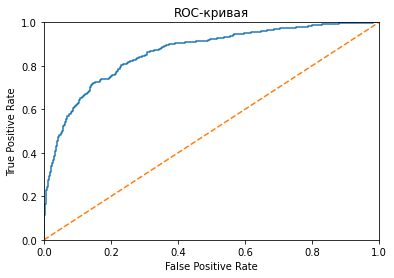

In [39]:
probabilities_test = model_rf.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds =  roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

## Вывод

Цель проекта заключалась в прогнозировании оттока клиентов из «Бета-Банка». Для достижения этой цели была построена модель с максимально возможным значением F1-меры, не менее 0.59. Кроме того, измерялась также AUC-ROC для сравнения с F1-мерой.

Проект был разделен на несколько этапов:

**Подготовка данных:**   
Произведено преобразование категориальных признаков в численные, обработаны пропущенные значения в столбце Tenure, а также удалены ненужные столбцы.

**Исследование задачи:**   
Выборка была разделена на обучающую, валидационную и тестовую. Произведено масштабирование признаков и инициализация трех моделей: DecisionTreeClassifier, RandomForestClassifier и LogisticRegression. Для каждой модели были подобраны оптимальные гиперпараметры.

**Борьба с дисбалансом:**   
Был проведен анализ баланса целевого признака, который оказался недостаточно сбалансированным. Для решения этой проблемы были применены три метода балансировки классов: взвешивание классов, Downsampling и Upsampling. Лучшее улучшение метрики F1 показало применение Upsampling.

**Тестирование модели:**   
Лучшая модель, RandomForestClassifier с применением Upsampling, была протестирована на тестовой выборке. Также была построена ROC-кривая.

Итоговые результаты проекта показали, что достигнута метрика F1-меры равная 0.614, что превышает требуемое значение 0.59. Это означает, что модель хорошо справляется с задачей прогнозирования оттока клиентов. AUC-ROC также была измерена и может быть использована для оценки качества модели, особенно в задачах с сильно несбалансированными классами.

Таким образом, был разработан успешный прогнозный алгоритм для предсказания оттока клиентов, который может быть использован банком для принятия соответствующих мер по удержанию клиентов и повышению их лояльности.